### Watershed

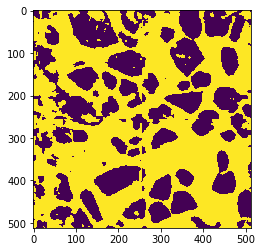

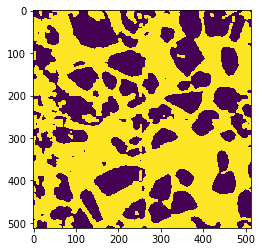

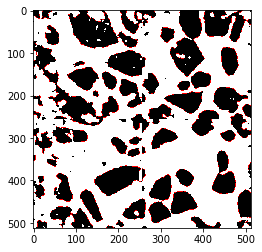

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_watershed/py_watershed.html

def main():
    watershed('check11_40_2.png')
    
def watershed(img_data):
    
    img = cv2.imread(img_data)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY)
    
    plt.imshow(thresh)
    plt.show()
    
    #noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    
    plt.imshow(opening)
    plt.show()
    
    #sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    
    #Finding sure foreground area
    #dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    #ret,sure_fg = cv2.threshold(dist_transfoem,0.7*dist_transform.max(),255,0)
        #distance-transform is unnecessary
    ret,sure_fg = cv2.threshold(opening,0.7*opening.max(),255,0)
    
    #Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)
    
    #Marker labelling
    ret,markers = cv2.connectedComponents(sure_fg)
    
    #Add one to all labels so that sure background is not 0, but 1
    markers = markers + 1
    
    #Now, mark the region of unknown with zero
    markers[unknown==255] = 0
    
    #watershed
    markers = cv2.watershed(img,markers)
    img[markers == -1] = [255,0,0]
    
    plt.imshow(img)
    plt.show

if __name__ == '__main__':
    main()